In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"Crop_Recommendation.csv")
data

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


## EXPLORATORY DATA ANALYSIS

In [4]:
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [5]:
data.tail()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Coffee


In [6]:
data.isna().any()

Nitrogen       False
Phosphorus     False
Potassium      False
Temperature    False
Humidity       False
pH_Value       False
Rainfall       False
Crop           False
dtype: bool

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
data.duplicated().any()

False

In [9]:
data.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## VISUALISING DATA BY MATPLOTLIB

In [11]:
data1=data.drop(['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','Rainfall'],axis=1)
data1

,pH_Value,Crop
0,6.502985,Rice
1,7.038096,Rice
2,7.840207,Rice
3,6.980401,Rice
4,7.628473,Rice
...,...,...
2195,6.780064,Coffee
2196,6.086922,Coffee
2197,6.362608,Coffee
2198,6.758793,Coffee


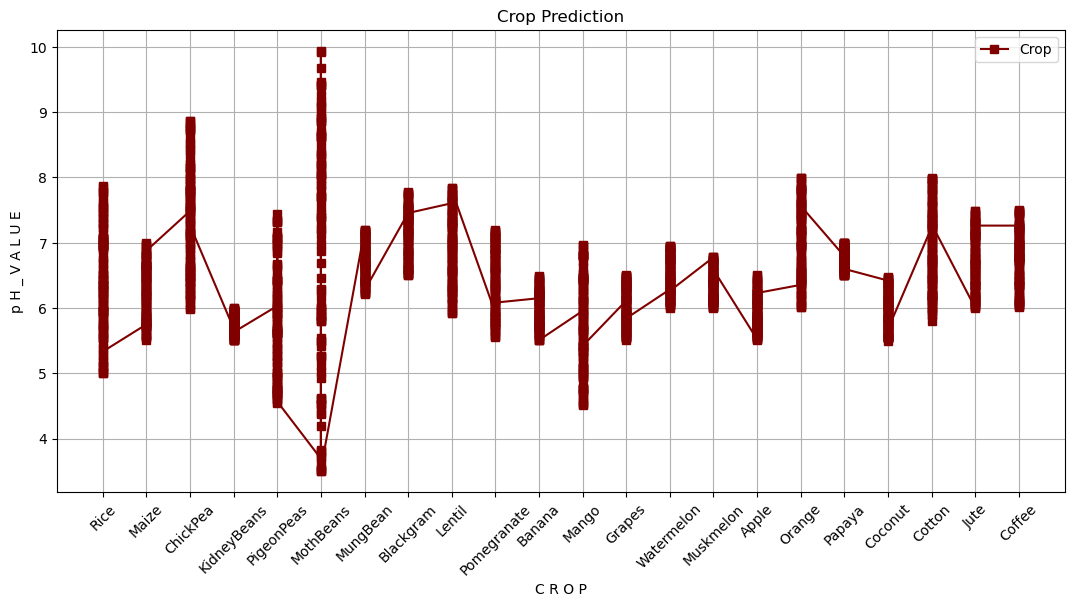

In [12]:
plt.figure(figsize=(13,6))
plt.plot(data['Crop'],data['pH_Value'],color='#800000',label='Crop',marker='s')
plt.xlabel('C R O P')
plt.ylabel('p H _ V A L U E')
plt.title('Crop Prediction')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

##### SETTING TARGET VALUE

In [14]:
x=data.drop(['Crop'],axis=1)
y=data['Crop']

In [15]:
y

0         Rice
1         Rice
2         Rice
3         Rice
4         Rice
         ...  
2195    Coffee
2196    Coffee
2197    Coffee
2198    Coffee
2199    Coffee
Name: Crop, Length: 2200, dtype: object

In [19]:
x

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=2)

In [27]:
ytrain

1494     Muskmelon
1508         Apple
488     PigeonPeas
1050        Banana
1480     Muskmelon
           ...    
1071        Banana
433     PigeonPeas
674       MungBean
1099        Banana
1608        Orange
Name: Crop, Length: 1540, dtype: object

In [28]:
xtrain

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
1494,89,25,50,27.048635,91.346851,6.375923,25.081467
1508,22,144,196,21.911913,91.687481,6.499227,117.076128
488,27,71,24,31.464179,48.176315,7.064973,165.405354
1050,107,72,45,28.149389,81.544489,5.790768,91.405084
1480,82,20,54,29.340336,90.015064,6.541150,21.445329
...,...,...,...,...,...,...,...
1071,105,88,54,25.787498,84.511942,6.020445,114.200546
433,27,71,23,23.453790,46.487148,7.109598,150.871220
674,23,39,22,29.256493,81.979522,6.864839,42.024833
1099,117,81,53,29.507046,78.205856,5.507642,98.125658


# MODEL FITTING

## LogisticRegression

In [35]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [39]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [40]:
poi=model.predict(xtest)
poi

array(['Coffee', 'Pomegranate', 'Pomegranate', 'Cotton', 'MungBean',
       'Coffee', 'Watermelon', 'Coconut', 'PigeonPeas', 'Mango',
       'ChickPea', 'Jute', 'Papaya', 'Blackgram', 'Mango', 'Maize',
       'Orange', 'Blackgram', 'Cotton', 'Orange', 'Banana', 'KidneyBeans',
       'Muskmelon', 'Banana', 'Mango', 'KidneyBeans', 'Coconut',
       'Coconut', 'Rice', 'MungBean', 'Pomegranate', 'ChickPea',
       'MungBean', 'MungBean', 'MothBeans', 'Coffee', 'Maize',
       'Muskmelon', 'MothBeans', 'Blackgram', 'Papaya', 'Pomegranate',
       'Pomegranate', 'Jute', 'MothBeans', 'Pomegranate', 'Pomegranate',
       'MungBean', 'Coffee', 'ChickPea', 'Coffee', 'Blackgram', 'Cotton',
       'PigeonPeas', 'Maize', 'Lentil', 'MungBean', 'Banana', 'Lentil',
       'Orange', 'Jute', 'Jute', 'PigeonPeas', 'Grapes', 'PigeonPeas',
       'Grapes', 'Grapes', 'Pomegranate', 'Coffee', 'Maize', 'Apple',
       'Orange', 'ChickPea', 'Mango', 'Banana', 'Maize', 'Banana', 'Jute',
       'Pomegranate', 'M

In [42]:
Logistictrain=model.score(xtrain,ytrain)*100
Logistictrain

97.07792207792207

In [43]:
Logistictest=model.score(xtest,ytest)*100
Logistictest

96.21212121212122

## DecisionTreeClassifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [51]:
DecisionTreetrain=model2.score(xtrain,ytrain)*100
DecisionTreetrain

100.0

In [53]:
DecisionTreetest=model2.score(xtest,ytest)*100
DecisionTreetest

98.48484848484848

## RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(n_estimators=100)
model3.fit(xtrain,ytrain)

RandomForestClassifier()

In [57]:
RandomForesttrain=model3.score(xtrain,ytrain)*100
RandomForesttrain

100.0

In [58]:
RandomForesttest=model3.score(xtest,ytest)*100
RandomForesttest

99.54545454545455

## AdaBoostClassifier

In [63]:
from sklearn.ensemble import AdaBoostClassifier
model4=AdaBoostClassifier(n_estimators=50)
model4.fit(xtrain,ytrain)

AdaBoostClassifier()

In [64]:
AdaBoosttrain=model4.score(xtrain,ytrain)*100
AdaBoosttrain

31.493506493506494

In [66]:
AdaBoosttest=model4.score(xtest,ytest)*100
AdaBoosttest

31.212121212121215

## GradientBoostingClassifier

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
model5=GradientBoostingClassifier(n_estimators=50)
model5.fit(xtrain,ytrain)

GradientBoostingClassifier(n_estimators=50)

In [71]:
Gradienttrain=model5.score(xtrain,ytrain)*100
Gradienttrain

100.0

In [72]:
Gradienttest=model5.score(xtest,ytest)*100
Gradienttest

99.39393939393939

## KNeighborsClassifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier
model6= KNeighborsClassifier(n_neighbors=5)
model6.fit(xtrain,ytrain)

KNeighborsClassifier()

In [75]:
KNeighborstrain=model5.score(xtrain,ytrain)*100
KNeighborstrain

100.0

In [76]:
KNeighborstest=model5.score(xtest,ytest)*100
KNeighborstest

99.39393939393939

## GaussianNB

In [78]:
from sklearn.naive_bayes import GaussianNB
model7=GaussianNB()

In [79]:
model7.fit(xtrain,ytrain)

GaussianNB()

In [80]:
Gaussiantrain=model7.score(xtrain,ytrain)*100
Gaussiantrain

99.61038961038962

In [81]:
Gaussiantest=model7.score(xtest,ytest)*100
Gaussiantest

99.24242424242425

## PREDICTION

In [83]:
Nitrogen=int(input("Enter the Nitrogen"))
Nitrogen

Enter the Nitrogen 22


22

In [86]:
Phosphorus=int(input("Enter the Phosphorus"))
Phosphorus

Enter the Phosphorus 42


42

In [97]:
Potassium=int(input("Enter the Potassium"))
Potassium

Enter the Potassium 2


2

In [99]:
Temperature=float(input("Enter the Temperature"))
Temperature

Enter the Temperature 4


4.0

In [101]:
Humidity=float(input("Enter the Humidity"))
Humidity

Enter the Humidity 6


6.0

In [103]:
pH_Value=float(input("Enter the pH_Value"))
pH_Value

Enter the pH_Value 2


2.0

In [105]:
Rainfall=float(input("Enter the pH_Value"))
Rainfall

Enter the pH_Value 33


33.0

In [107]:
print(model3.predict([[Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall]]))

['KidneyBeans']


In [110]:
score=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier',
                           'KNeighborsClassifier','AdaBoostClassifier','GradientBoostClassifier','GaussianNB'],
                    'TrainingScores': [Logistictrain,DecisionTreetrain,RandomForesttrain,KNeighborstrain,AdaBoosttrain,Gradienttrain,Gaussiantrain],
                    'TestingScore': [Logistictest,DecisionTreetest,RandomForesttest,KNeighborstest,AdaBoosttest,Gradienttest,Gaussiantest]})
score

,Model,TrainingScores,TestingScore
0,LogisticRegression,97.077922,96.212121
1,DecisionTreeClassifier,100.000000,98.484848
2,RandomForestClassifier,100.000000,99.545455
3,KNeighborsClassifier,100.000000,99.393939
4,AdaBoostClassifier,31.493506,31.212121
5,GradientBoostClassifier,100.000000,99.393939
6,GaussianNB,99.610390,99.242424


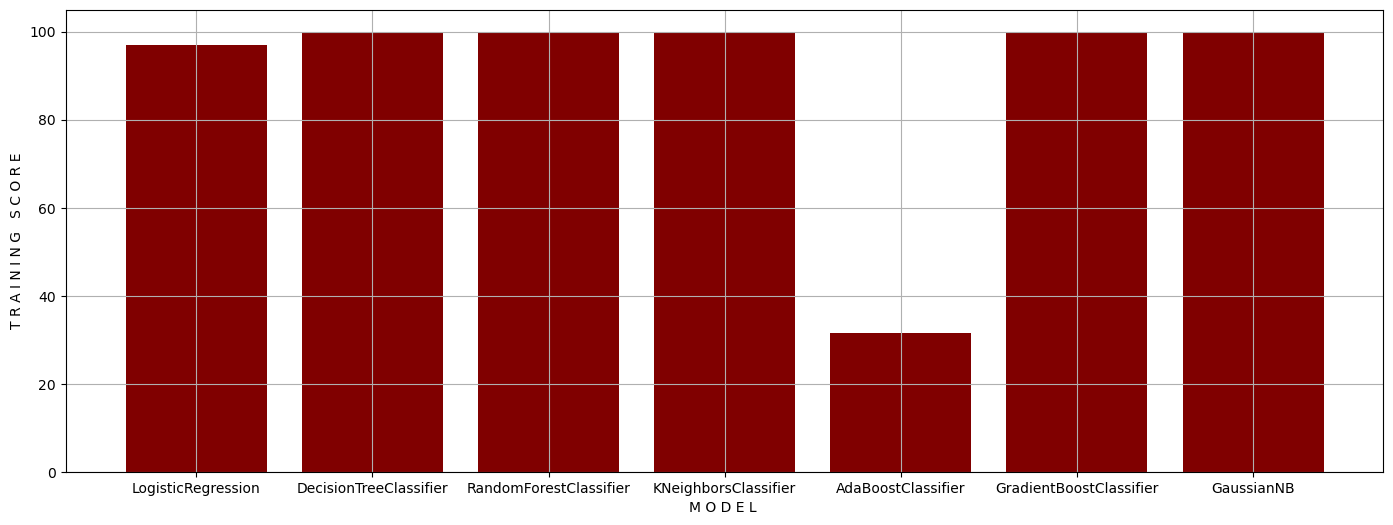

In [112]:
x=score.Model
y=score.TrainingScores
plt.figure(figsize=(17,6))
plt.bar(x,y,color='#800000')
plt.xlabel('M O D E L ')
plt.ylabel('T R A I N I N G   S C O R E')
plt.grid(True)
plt.show()

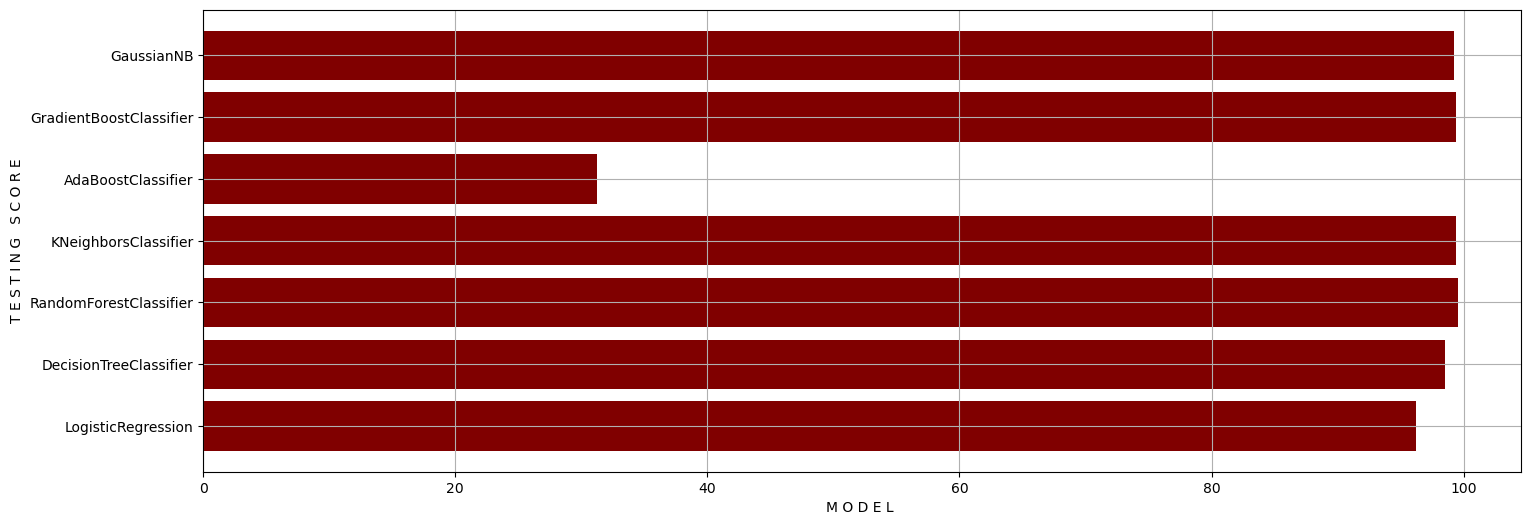

In [114]:
x=score.Model
y=score.TestingScore
plt.figure(figsize=(17,6))
plt.barh(x,y,color='#800000')
plt.xlabel('M O D E L ')
plt.ylabel('T E S T I N G   S C O R E')
plt.grid(True)
plt.show()

# Build Gradio App

In [117]:
!pip3 install gradio
#user interface

In [118]:
def fun(Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall):
    pred = model3.predict([[Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall]])
    return pred
        
fun(Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall)

array(['KidneyBeans'], dtype=object)

In [121]:
import gradio as gr

In [125]:
headline ="Crop predicrion App"
iface = gr.Interface(fn=fun,inputs=[
        gr.Textbox(label="Nitrogen"),
        gr.Textbox(label="Phosphorus"),
        gr.Textbox(label="Potassium"),
        gr.Textbox(label="Temperature"),
        gr.Textbox(label="Humidity"),
        gr.Textbox(label="pH_Value"),
        gr.Textbox(label="Rainfall")],
        outputs=[gr.Textbox(label="Crop")],title=headline)
iface.launch(share=True)

#change baground color
#,css=".gradio-container {background-color: #ff5733;}"

* Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


# END
